In [3]:
import numpy as np
import sklearn
import tensorflow as tf

print("NumPy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("TensorFlow:", tf.__version__)


NumPy: 1.26.4
scikit-learn: 1.3.2
TensorFlow: 2.15.0


In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] 
df = pd.read_csv(r"magic04.data", names=cols)

In [6]:
df.head()#We can see we don't have labels in these, so we are gonna add labels to them

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df["class"].unique()#g-> Gamma, h-> Hydrones
#converting this 0-> g and 1 -> h

array(['g', 'h'], dtype=object)

In [8]:
df["class"] = (df["class"] == "g").astype(int)

In [9]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

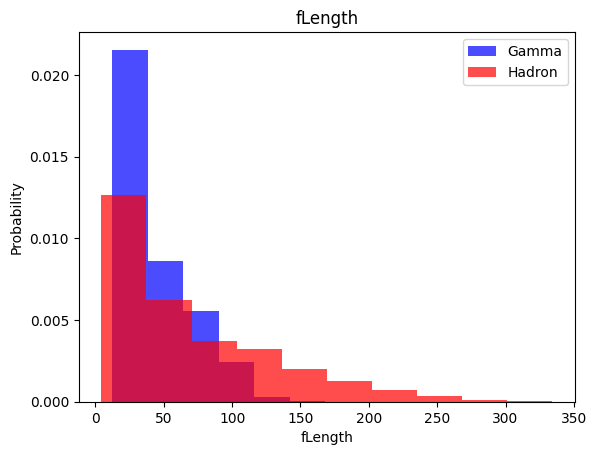

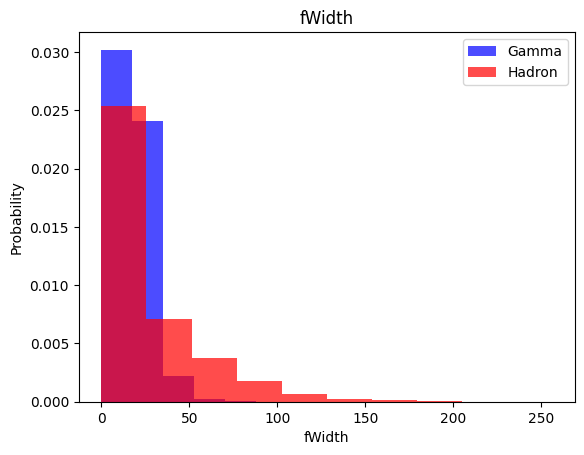

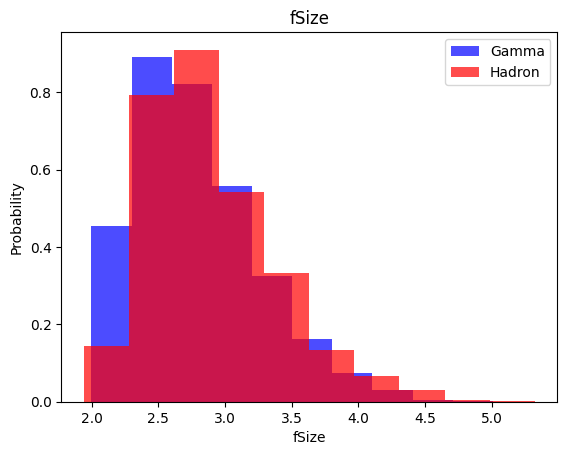

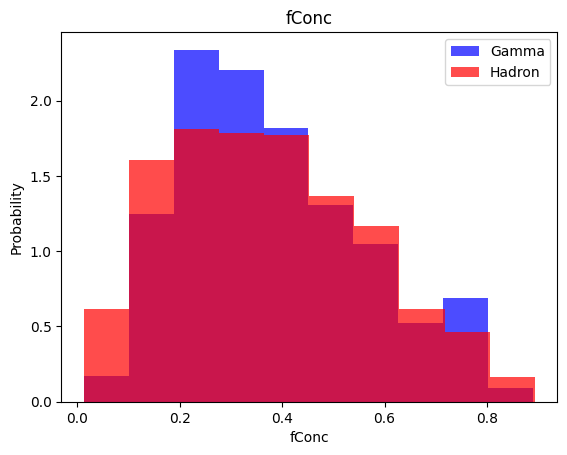

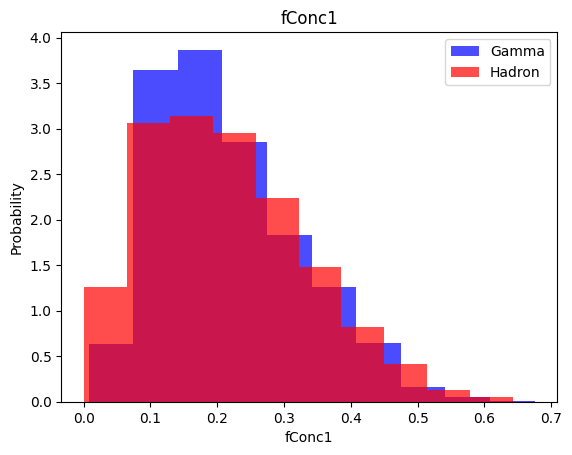

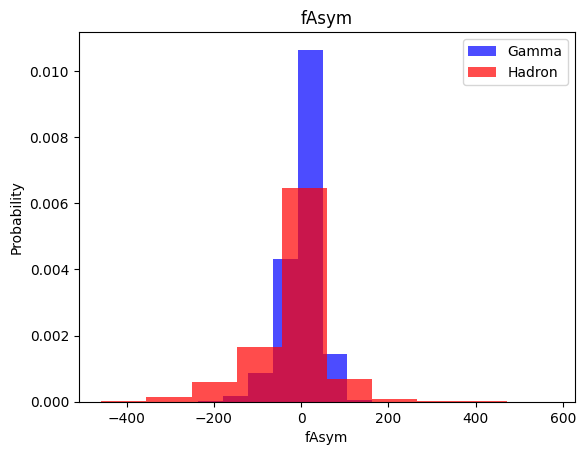

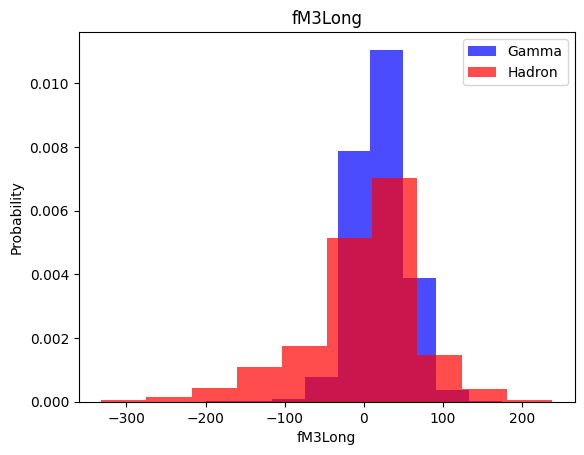

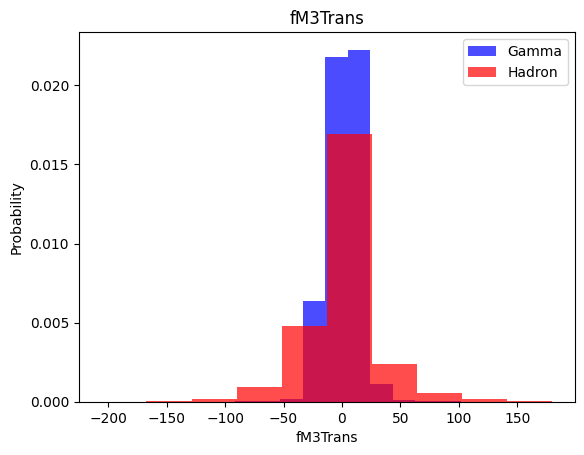

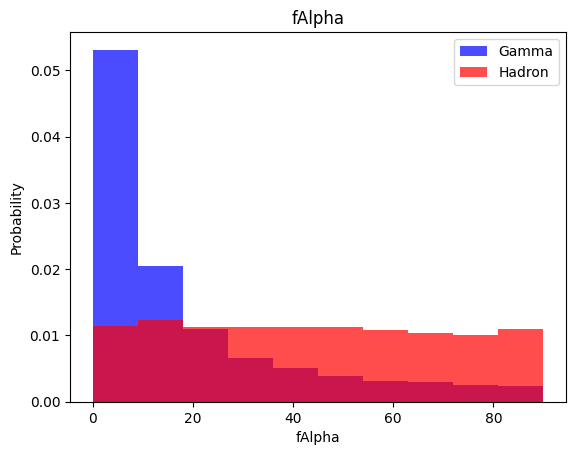

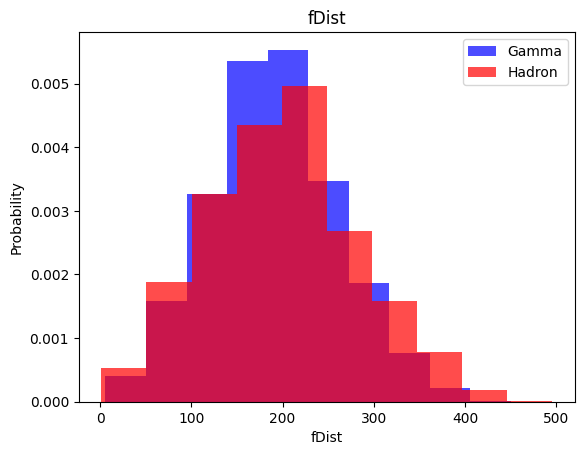

In [10]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="Gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0] [label], color="red", label="Hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Creating Train, Testing and Validation Datasets

In [11]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y  = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [13]:
train

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
7691   43.8241  16.8473  2.7712  0.3014  0.1634  46.8169 -23.0564   14.2963   
491    25.5991  12.5304  2.6959  0.4995  0.3293   7.2105 -19.2635   -9.9130   
13023  16.4960  11.2599  2.5000  0.5795  0.3487  12.2759  -4.1539   -7.5753   
15502  20.2877  16.9833  2.7716  0.4518  0.2496  14.0732   6.5384   10.4000   
3474   21.5363   9.9292  2.2672  0.6270  0.3378  22.0481  18.4537  -11.1982   
...        ...      ...     ...     ...     ...      ...      ...       ...   
1416   25.2997  20.7144  2.9004  0.3308  0.1717  23.7771  18.9769  -16.1827   
7601   15.9514  10.8444  2.2765  0.6878  0.4630  -2.4098  -3.5824    9.0151   
4065   28.9235  13.4240  2.5472  0.4113  0.2340  20.0979  22.1078   -5.4731   
16497  18.9618  11.3578  2.2708  0.7775  0.4159  26.6424  17.8537   -2.6126   
17846  26.8522   8.2189  2.5031  0.6342  0.3407  17.7446 -13.3514   -4.8033   

        fAlpha     fDist  class  
7691    2.7460  243.7840      1  
491     8.7515  215.7070      1  
13023  61.2842  257.6402      0  
15502  12.8744   67.6394      0  
3474   24.0767  181.7670      1  
...        ...       ...    ...  
1416    3.7620  141.2250      1  
7601   84.0046  147.3960      1  
4065   16.8590  243.2090      1  
16497  34.1441  195.4867      0  
17846  29.8100  120.7040      0  

[11412 rows x 11 columns]

In [14]:
print(len(train[train["class"] == 1])) #Gamma Ones
print(len(train[train["class"] == 0])) #Hydron Ones

7330
4082


In [15]:
train, X_train, y_train  =  scale_dataset(train, oversample=True)
valid, X_valid, y_valid  =  scale_dataset(valid, oversample=False)
test, X_test, y_test  =  scale_dataset(test, oversample=False)

In [16]:
len(y_train)

14660

In [17]:
sum(y_train == 1)

7330

In [18]:
sum(y_train == 0)

7330

# Using k-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # for classification report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5) #Try n_neighbors value 1,3 and 5 and check the result
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1341
           1       0.85      0.88      0.86      2463

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Using Naive bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [25]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1341
           1       0.73      0.90      0.81      2463

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [28]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1341
           1       0.85      0.82      0.83      2463

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machine

In [29]:
#SVM Implementation
from sklearn.svm import SVC

In [30]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [31]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1341
           1       0.89      0.90      0.89      2463

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [32]:
import tensorflow as tf

In [33]:
def plot_history(history):
    """Plot training and validation loss across epochs."""
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()


In [34]:
# plot_history(history)

In [ ]:
# # Create a sequential neural network model
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), 
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(num_nodes, activation='relu'), 
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]) 

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
        metrics=['accuracy'])

    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    return nn_model, history

In [36]:
# history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0) using verbose won't print the epoch number and loss

In [38]:
# plot_loss(history)
# plot_accuracy(history)

16 nodes, droupout prob 0, lr 0.01, batch size 32


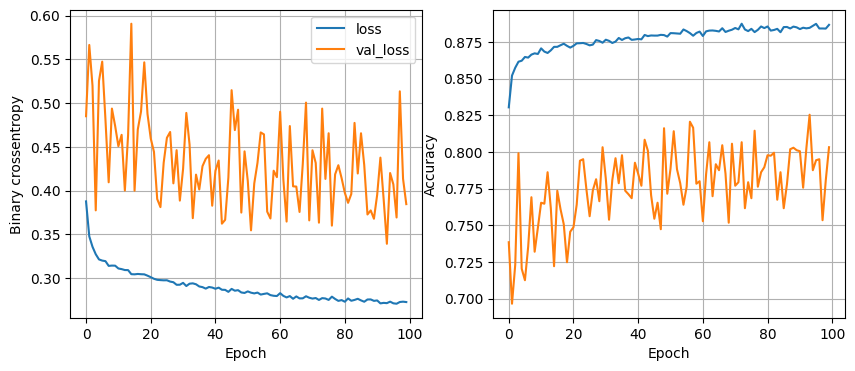

119/119 [==============================] - 0s 1ms/step - loss: 0.3249 - accuracy: 0.8751
16 nodes, droupout prob 0, lr 0.01, batch size 64


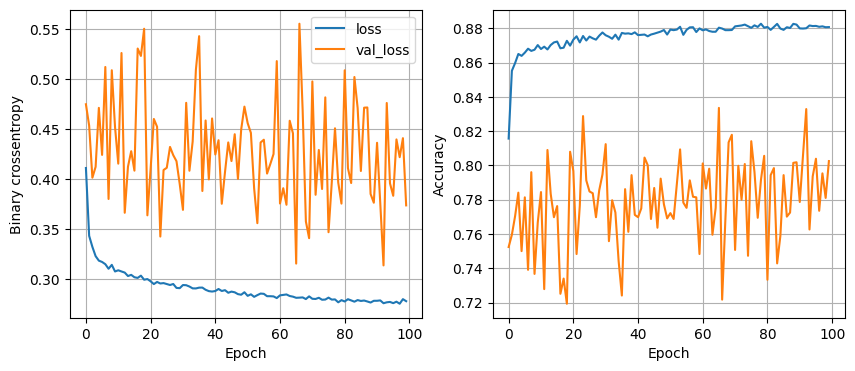

119/119 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8762
16 nodes, droupout prob 0, lr 0.01, batch size 128


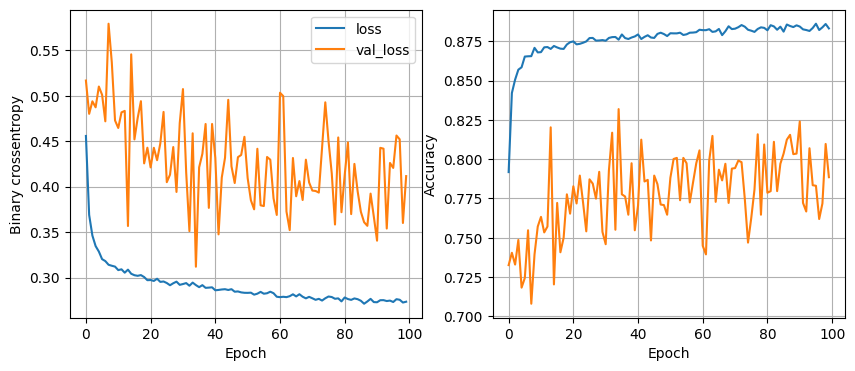

119/119 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.8764
16 nodes, droupout prob 0, lr 0.005, batch size 32


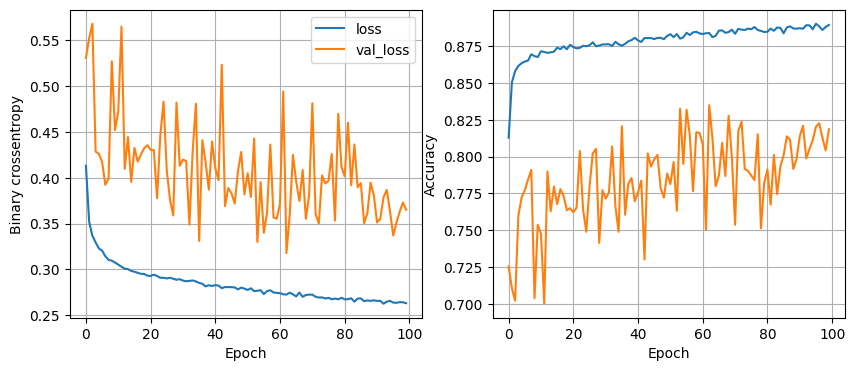

119/119 [==============================] - 0s 715us/step - loss: 0.3188 - accuracy: 0.8743
16 nodes, droupout prob 0, lr 0.005, batch size 64


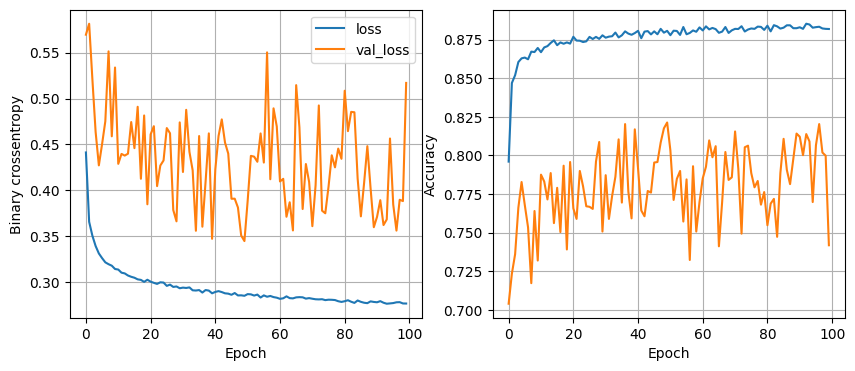

119/119 [==============================] - 0s 3ms/step - loss: 0.3242 - accuracy: 0.8704
16 nodes, droupout prob 0, lr 0.005, batch size 128


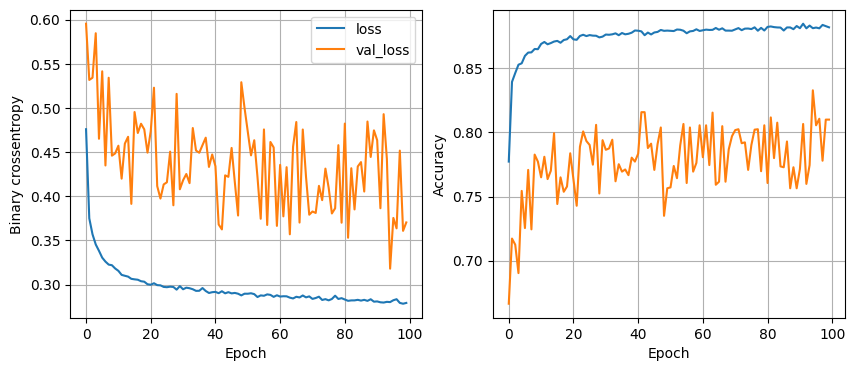

119/119 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8678
16 nodes, droupout prob 0, lr 0.001, batch size 32


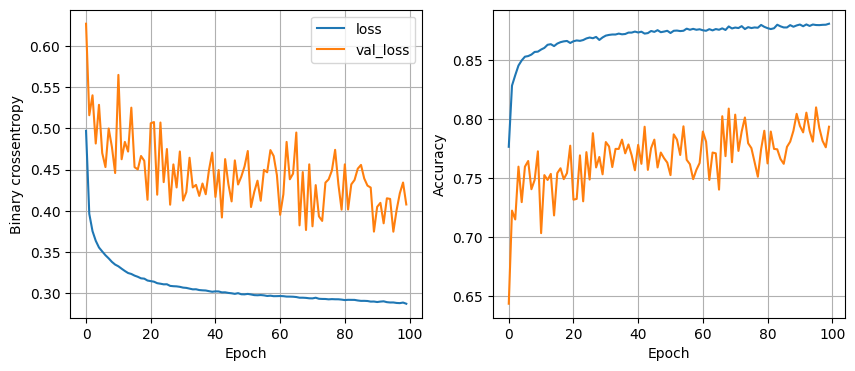

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8709
16 nodes, droupout prob 0, lr 0.001, batch size 64


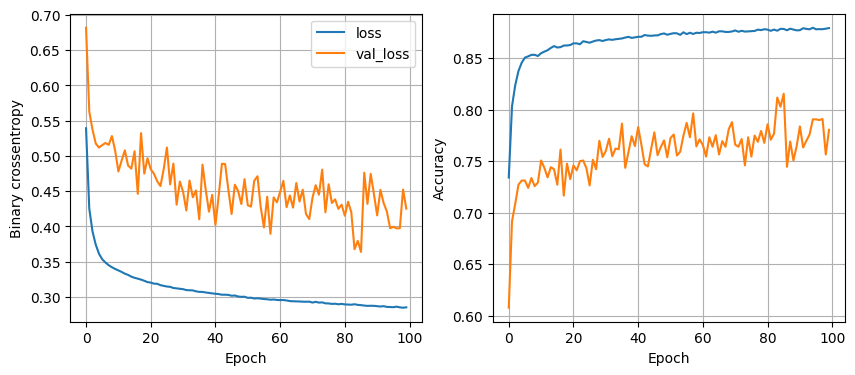

119/119 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8733
16 nodes, droupout prob 0, lr 0.001, batch size 128


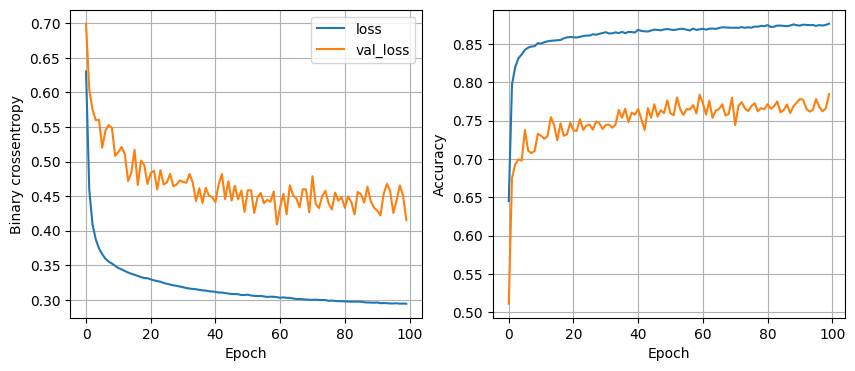

119/119 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8701
16 nodes, droupout prob 0.2, lr 0.01, batch size 32


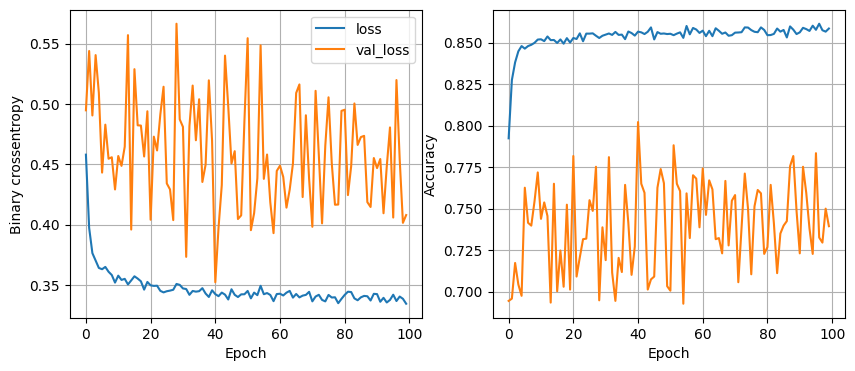

119/119 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8741
16 nodes, droupout prob 0.2, lr 0.01, batch size 64


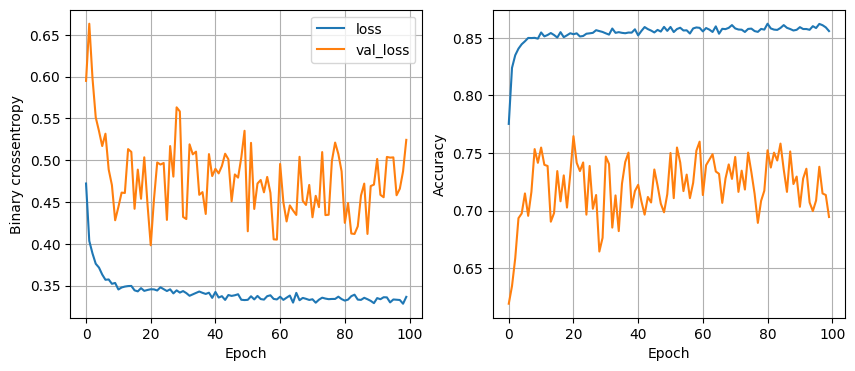

119/119 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8699
16 nodes, droupout prob 0.2, lr 0.01, batch size 128


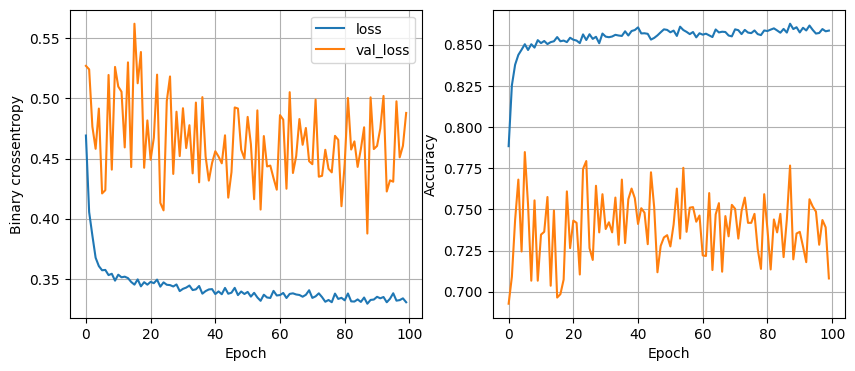

119/119 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8704
16 nodes, droupout prob 0.2, lr 0.005, batch size 32


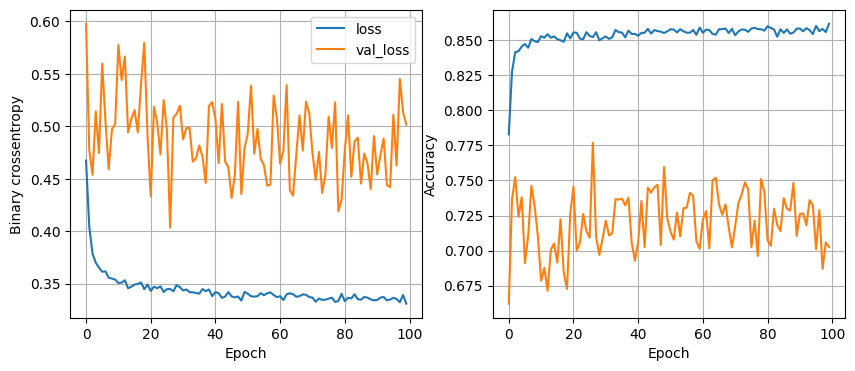

119/119 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8712
16 nodes, droupout prob 0.2, lr 0.005, batch size 64


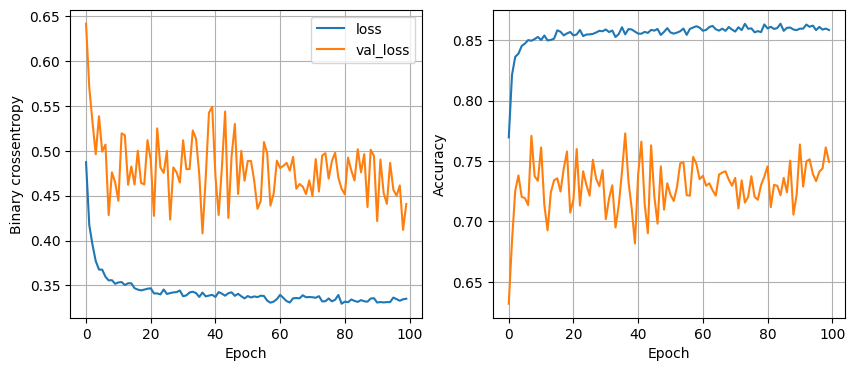

119/119 [==============================] - 0s 808us/step - loss: 0.3177 - accuracy: 0.8759
16 nodes, droupout prob 0.2, lr 0.005, batch size 128


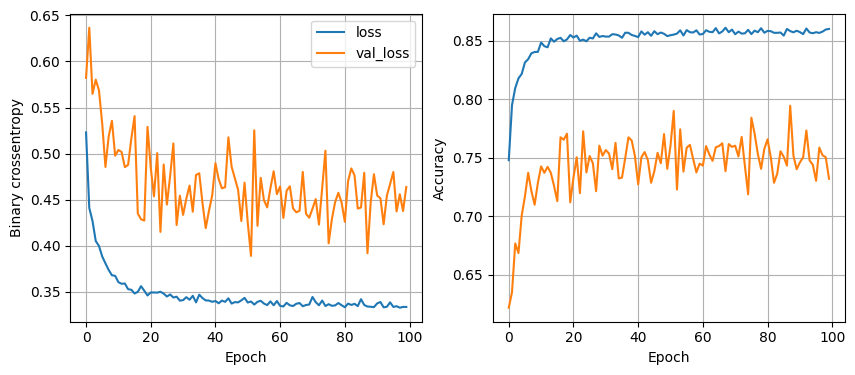

119/119 [==============================] - 0s 830us/step - loss: 0.3120 - accuracy: 0.8793
16 nodes, droupout prob 0.2, lr 0.001, batch size 32


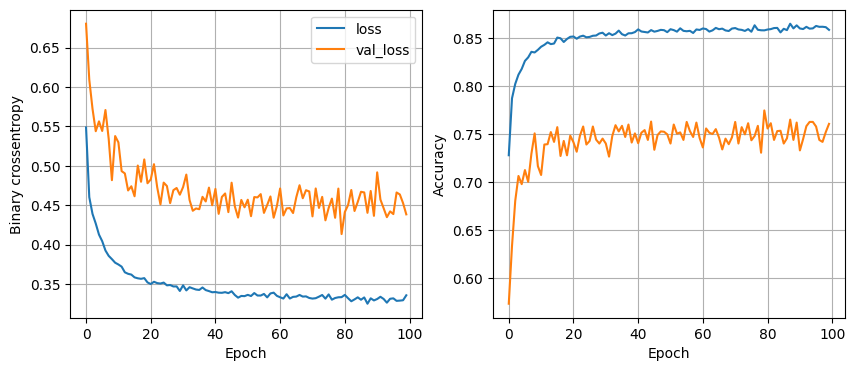

119/119 [==============================] - 0s 777us/step - loss: 0.3196 - accuracy: 0.8749
16 nodes, droupout prob 0.2, lr 0.001, batch size 64


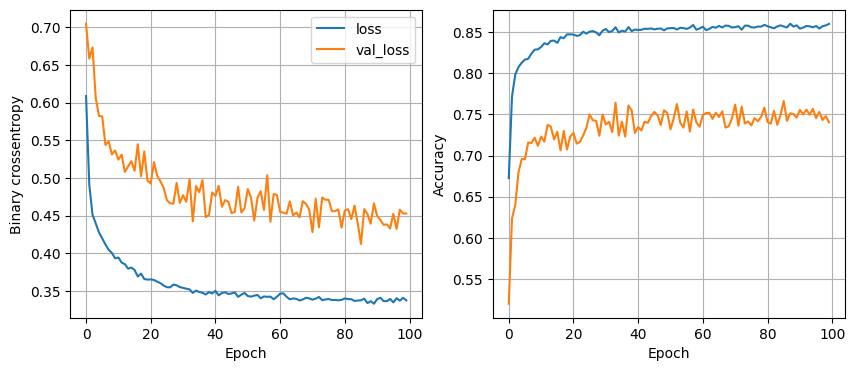

119/119 [==============================] - 0s 634us/step - loss: 0.3225 - accuracy: 0.8728
16 nodes, droupout prob 0.2, lr 0.001, batch size 128


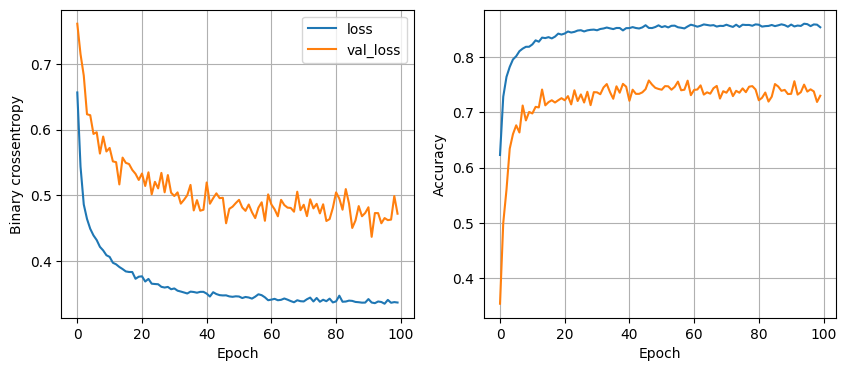

119/119 [==============================] - 0s 652us/step - loss: 0.3232 - accuracy: 0.8696
32 nodes, droupout prob 0, lr 0.01, batch size 32


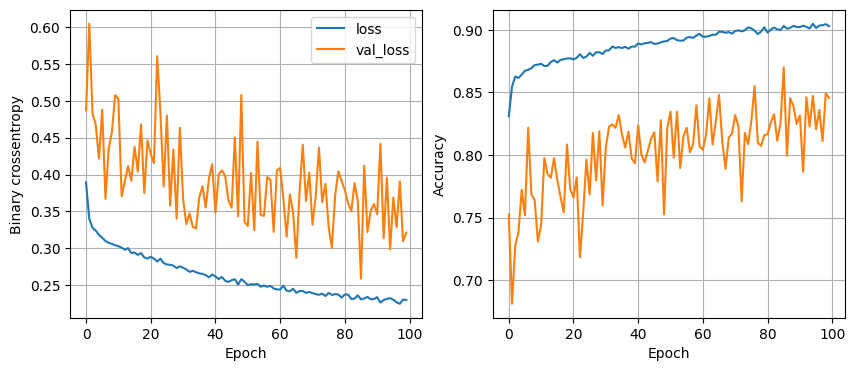

119/119 [==============================] - 0s 973us/step - loss: 0.3763 - accuracy: 0.8707
32 nodes, droupout prob 0, lr 0.01, batch size 64


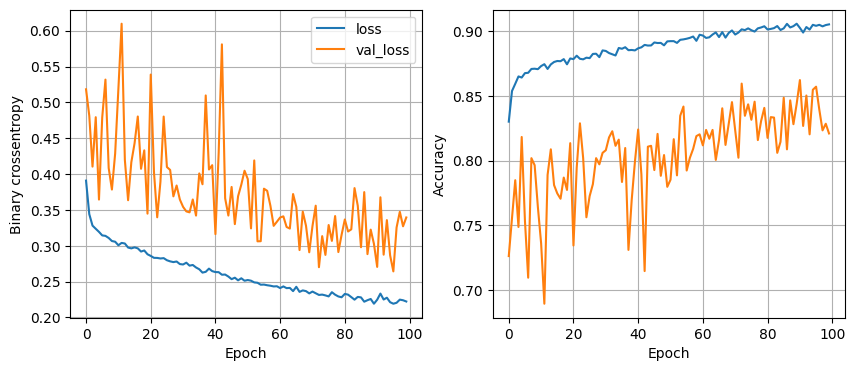

119/119 [==============================] - 0s 683us/step - loss: 0.4023 - accuracy: 0.8628
32 nodes, droupout prob 0, lr 0.01, batch size 128


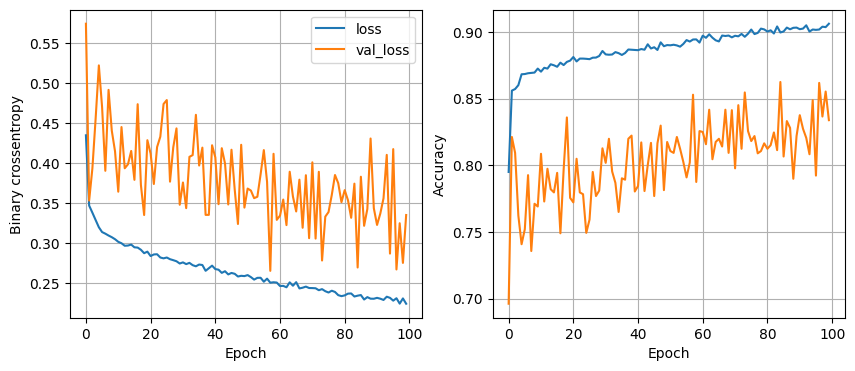

119/119 [==============================] - 0s 680us/step - loss: 0.3678 - accuracy: 0.8675
32 nodes, droupout prob 0, lr 0.005, batch size 32


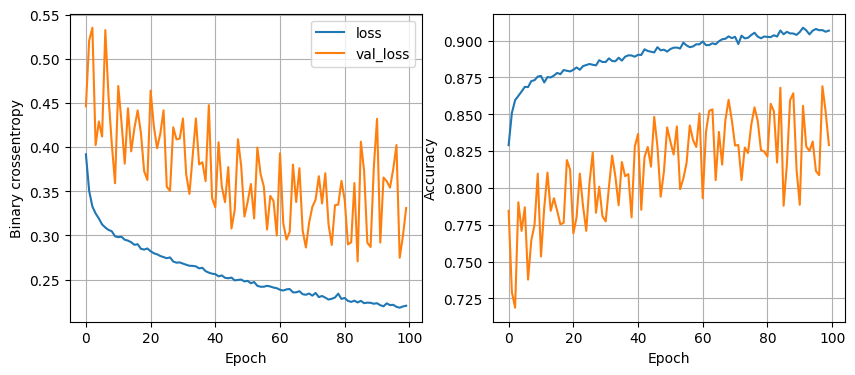

119/119 [==============================] - 0s 670us/step - loss: 0.3757 - accuracy: 0.8609
32 nodes, droupout prob 0, lr 0.005, batch size 64


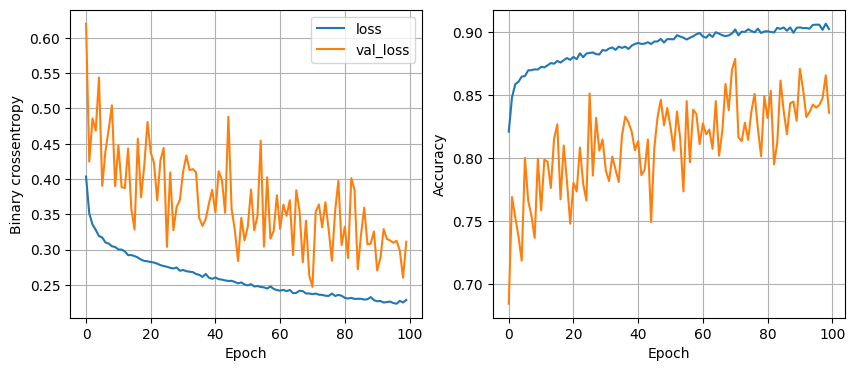

119/119 [==============================] - 0s 890us/step - loss: 0.3716 - accuracy: 0.8654
32 nodes, droupout prob 0, lr 0.005, batch size 128


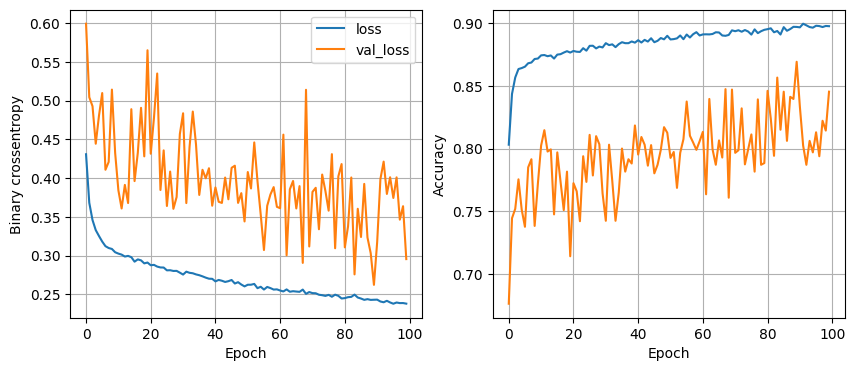

119/119 [==============================] - 0s 746us/step - loss: 0.3443 - accuracy: 0.8641
32 nodes, droupout prob 0, lr 0.001, batch size 32


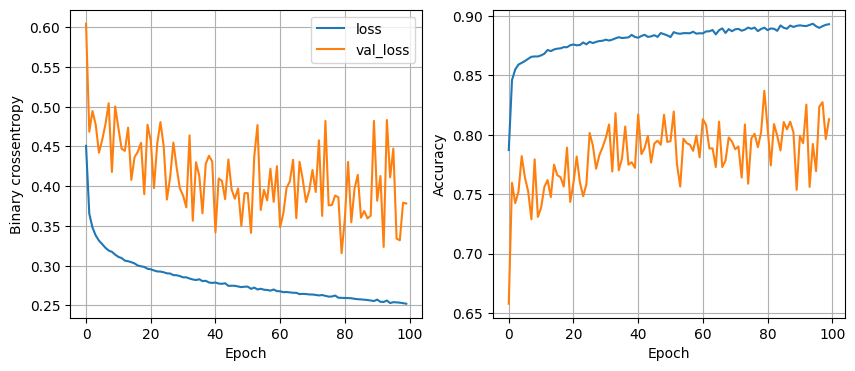

119/119 [==============================] - 0s 704us/step - loss: 0.3291 - accuracy: 0.8746
32 nodes, droupout prob 0, lr 0.001, batch size 64


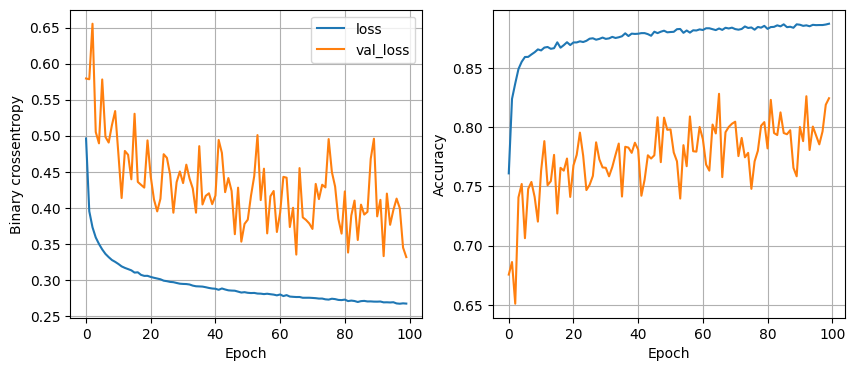

119/119 [==============================] - 0s 754us/step - loss: 0.3341 - accuracy: 0.8670
32 nodes, droupout prob 0, lr 0.001, batch size 128


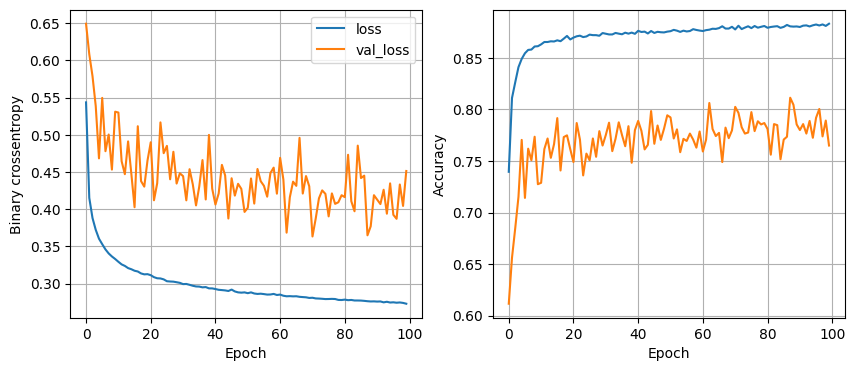

119/119 [==============================] - 0s 670us/step - loss: 0.3232 - accuracy: 0.8699
32 nodes, droupout prob 0.2, lr 0.01, batch size 32


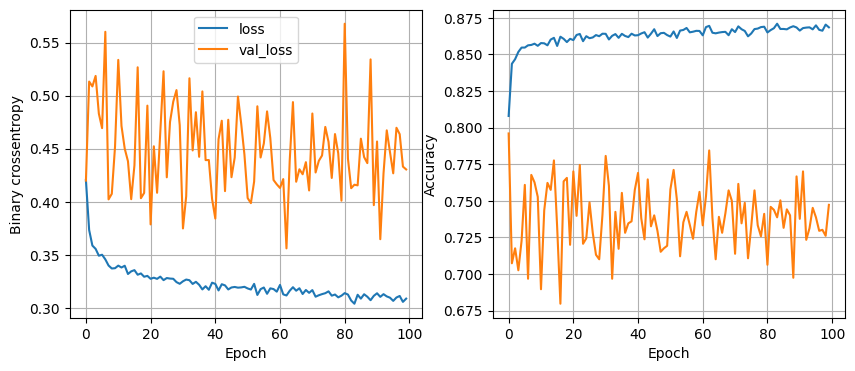

119/119 [==============================] - 0s 763us/step - loss: 0.3170 - accuracy: 0.8778
32 nodes, droupout prob 0.2, lr 0.01, batch size 64


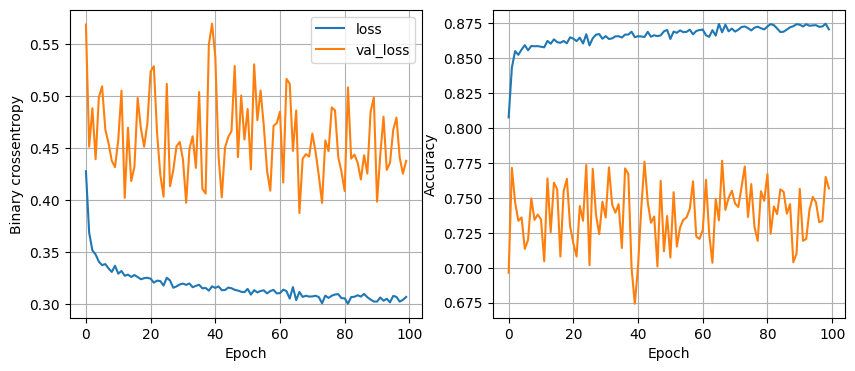

119/119 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8788
32 nodes, droupout prob 0.2, lr 0.01, batch size 128


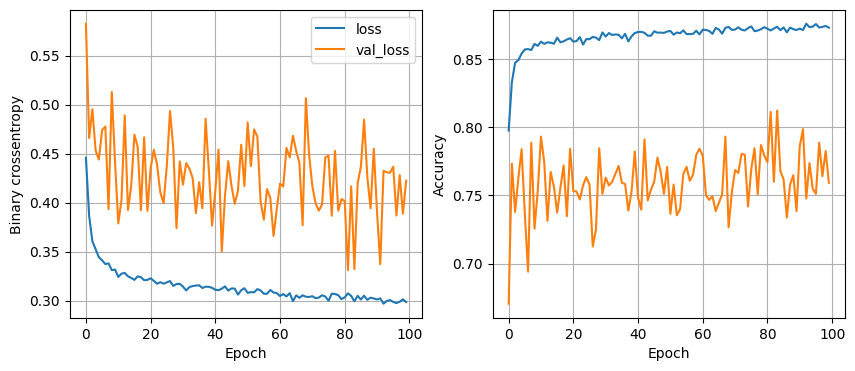

119/119 [==============================] - 0s 933us/step - loss: 0.3038 - accuracy: 0.8843
32 nodes, droupout prob 0.2, lr 0.005, batch size 32


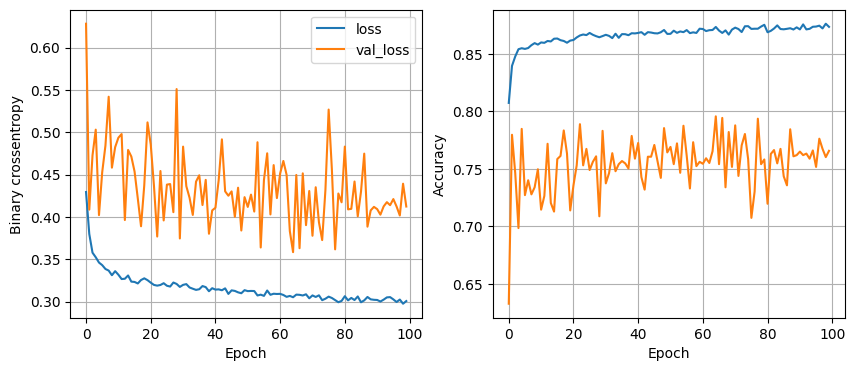

119/119 [==============================] - 0s 1ms/step - loss: 0.3049 - accuracy: 0.8788
32 nodes, droupout prob 0.2, lr 0.005, batch size 64


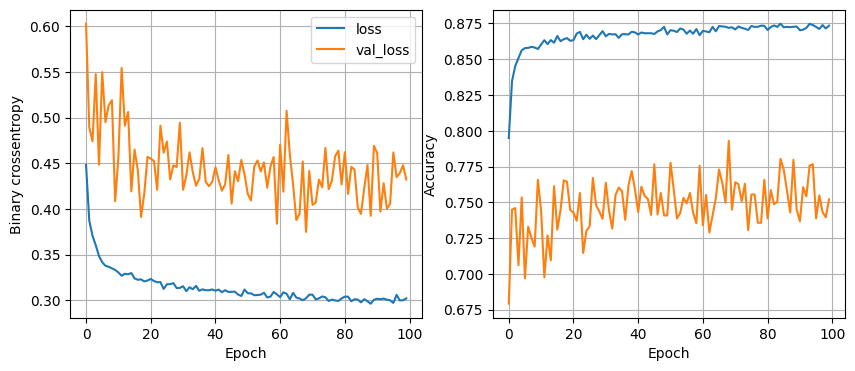

119/119 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8783
32 nodes, droupout prob 0.2, lr 0.005, batch size 128


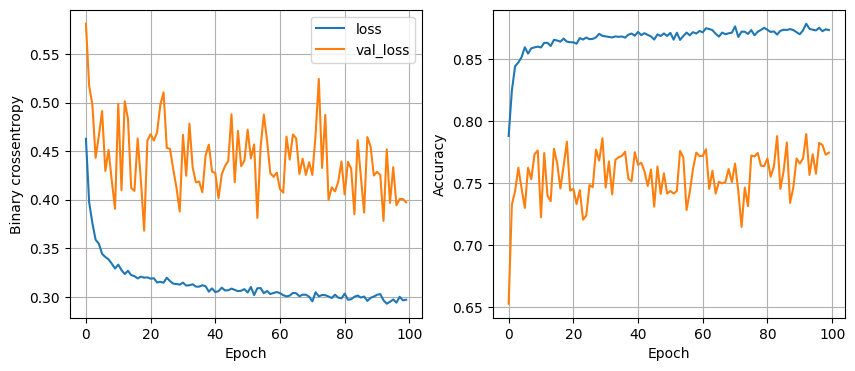

119/119 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8799
32 nodes, droupout prob 0.2, lr 0.001, batch size 32


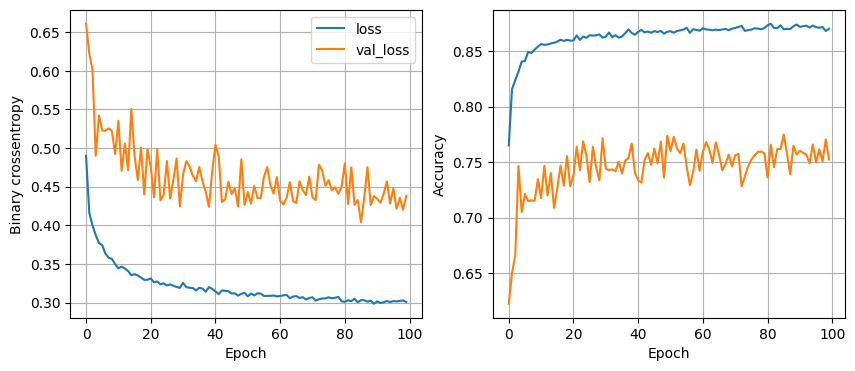

119/119 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8788
32 nodes, droupout prob 0.2, lr 0.001, batch size 64


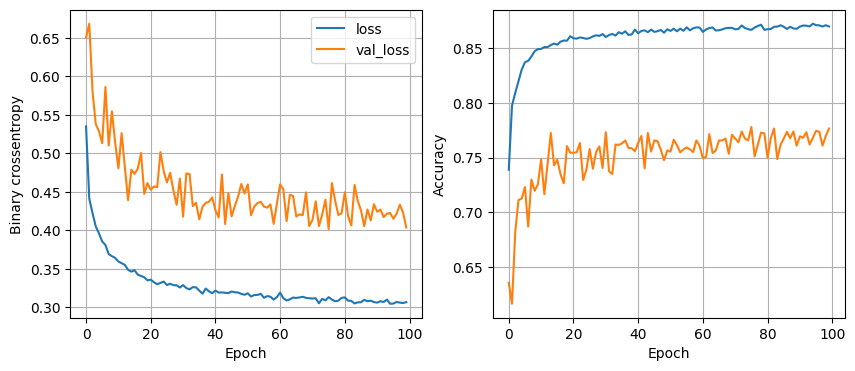

119/119 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8788
32 nodes, droupout prob 0.2, lr 0.001, batch size 128


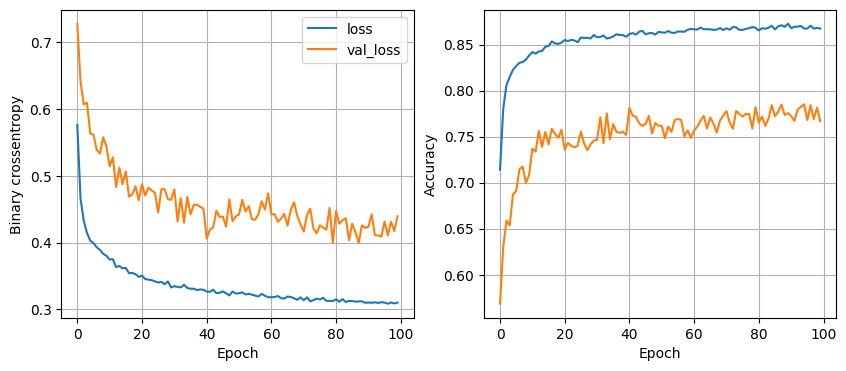

119/119 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8785
64 nodes, droupout prob 0, lr 0.01, batch size 32


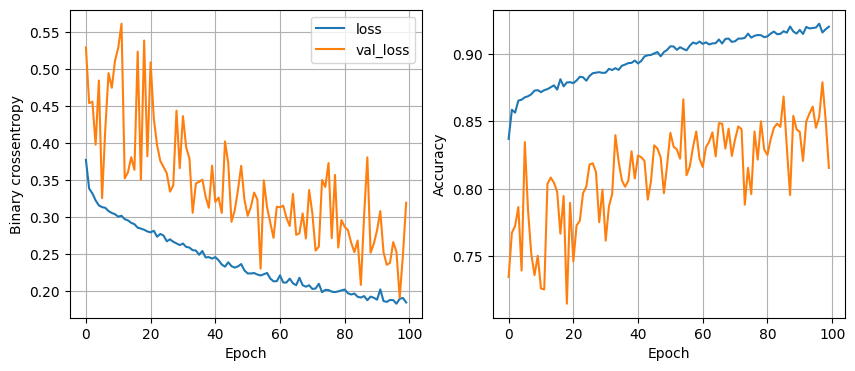

119/119 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8715
64 nodes, droupout prob 0, lr 0.01, batch size 64


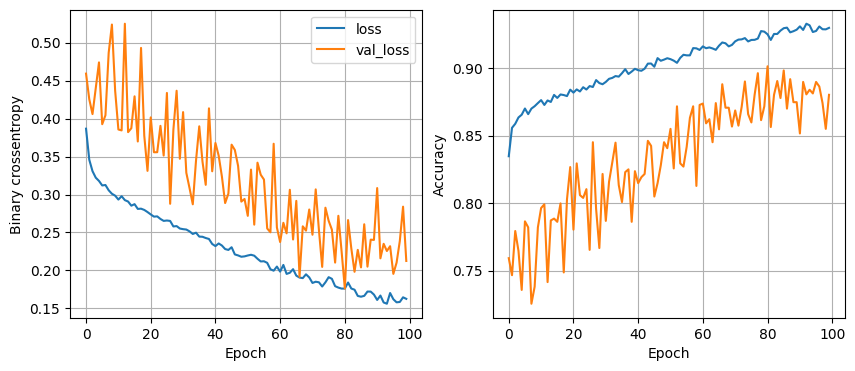

119/119 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.8562
64 nodes, droupout prob 0, lr 0.01, batch size 128


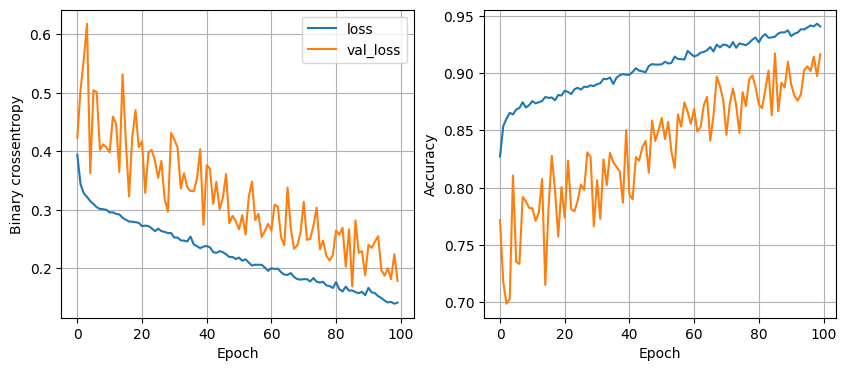

119/119 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.8499
64 nodes, droupout prob 0, lr 0.005, batch size 32


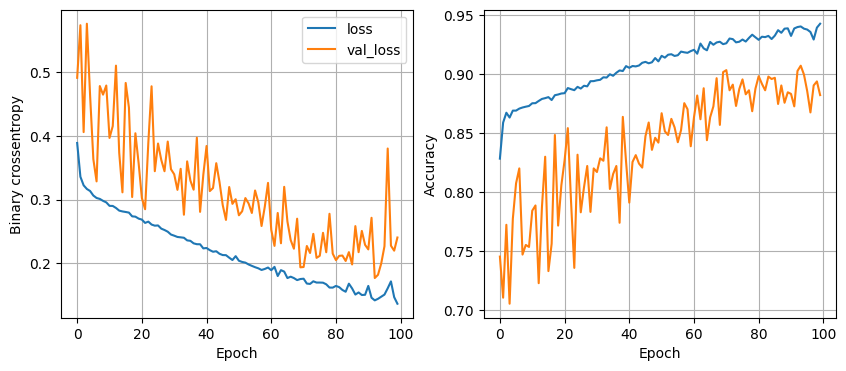

119/119 [==============================] - 0s 1ms/step - loss: 0.5549 - accuracy: 0.8636
64 nodes, droupout prob 0, lr 0.005, batch size 64


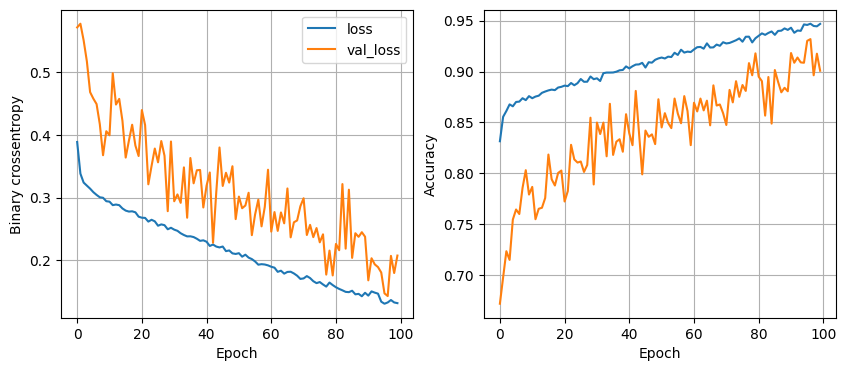

119/119 [==============================] - 0s 670us/step - loss: 0.5880 - accuracy: 0.8596
64 nodes, droupout prob 0, lr 0.005, batch size 128


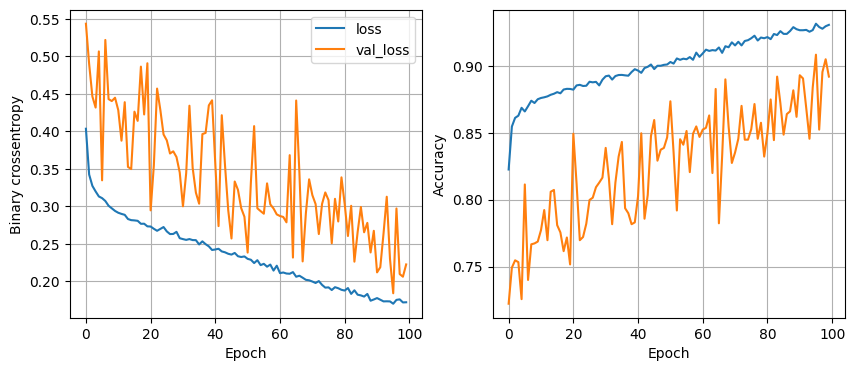

119/119 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.8502
64 nodes, droupout prob 0, lr 0.001, batch size 32


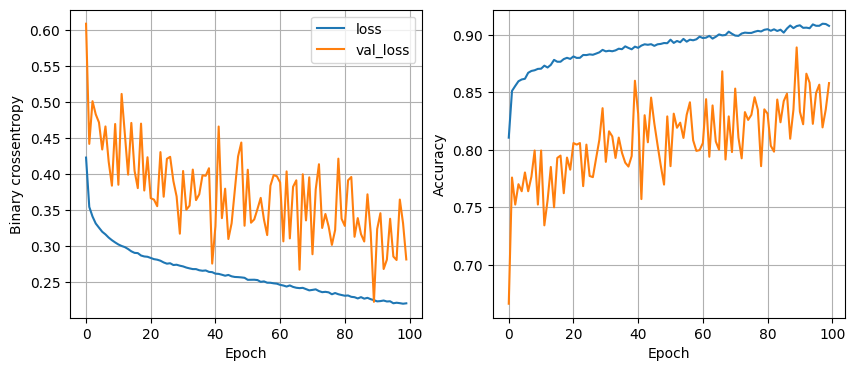

119/119 [==============================] - 0s 842us/step - loss: 0.3540 - accuracy: 0.8612
64 nodes, droupout prob 0, lr 0.001, batch size 64


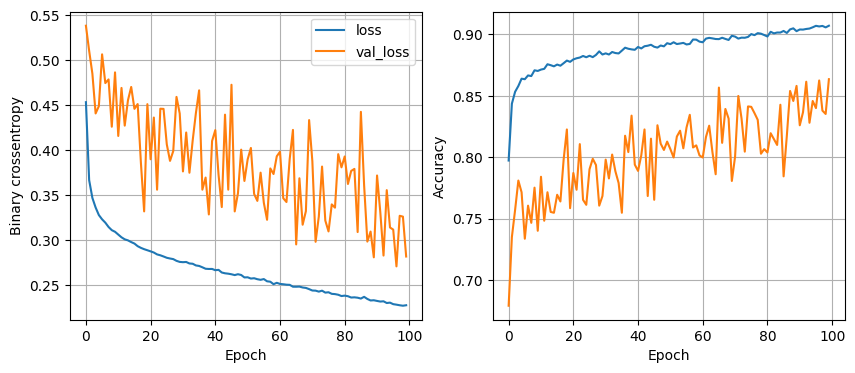

119/119 [==============================] - 0s 975us/step - loss: 0.3471 - accuracy: 0.8646
64 nodes, droupout prob 0, lr 0.001, batch size 128


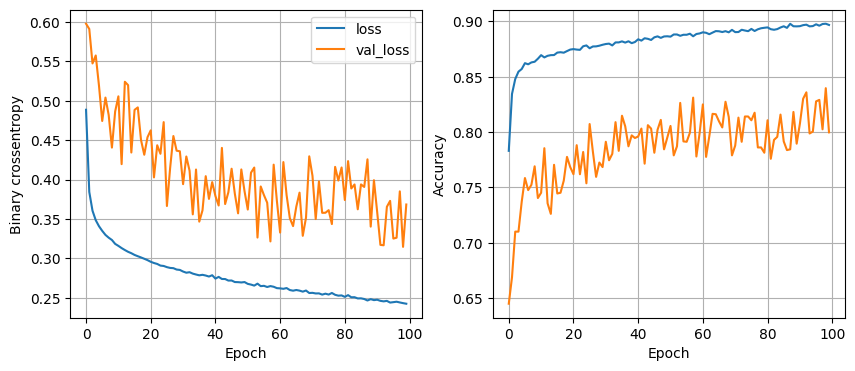

119/119 [==============================] - 0s 912us/step - loss: 0.3284 - accuracy: 0.8725
64 nodes, droupout prob 0.2, lr 0.01, batch size 32


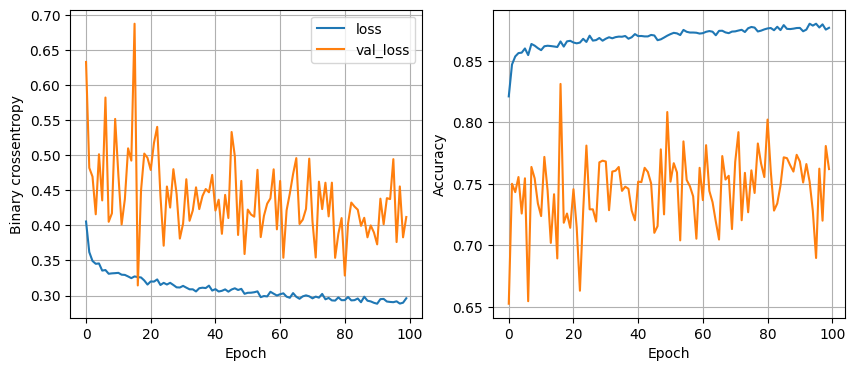

119/119 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8817
64 nodes, droupout prob 0.2, lr 0.01, batch size 64


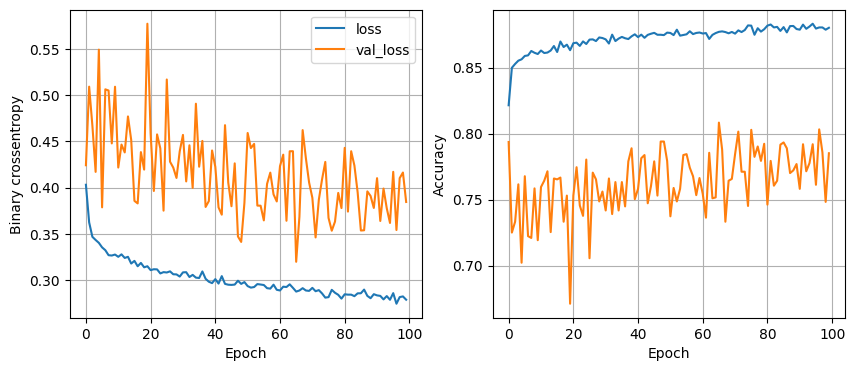

119/119 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8762
64 nodes, droupout prob 0.2, lr 0.01, batch size 128


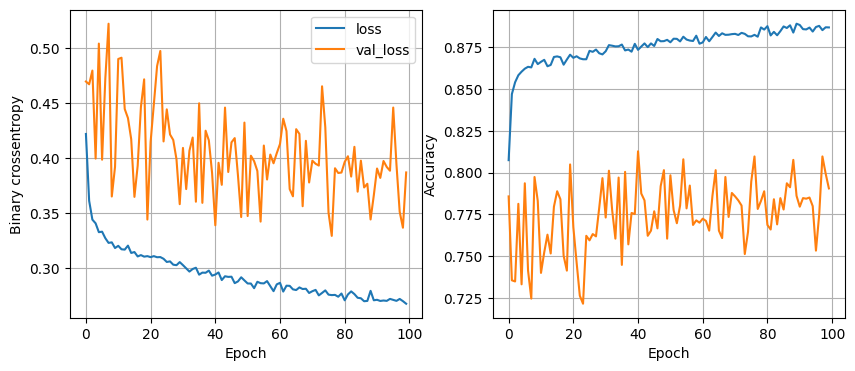

119/119 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8783
64 nodes, droupout prob 0.2, lr 0.005, batch size 32


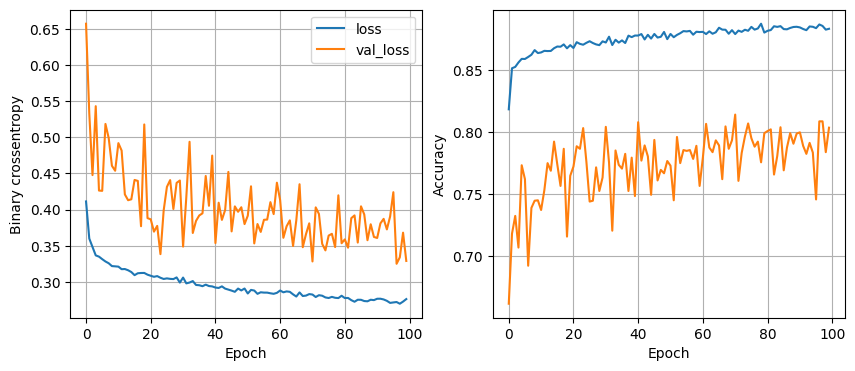

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8759
64 nodes, droupout prob 0.2, lr 0.005, batch size 64


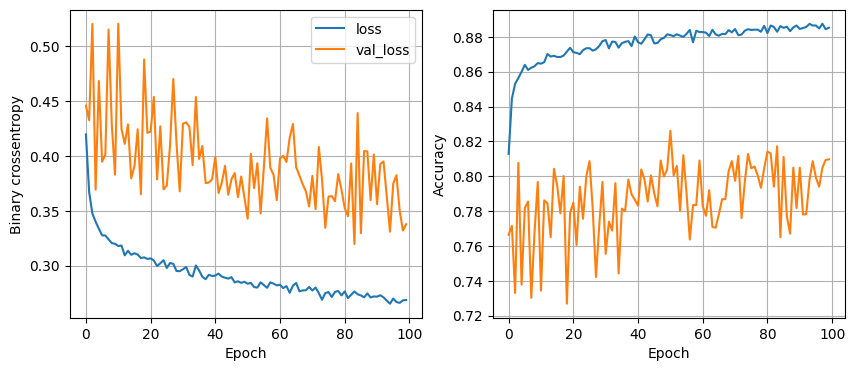

119/119 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8730
64 nodes, droupout prob 0.2, lr 0.005, batch size 128


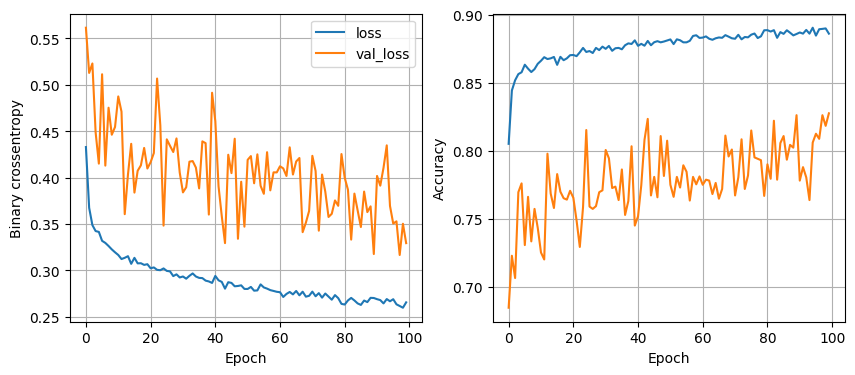

119/119 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8743
64 nodes, droupout prob 0.2, lr 0.001, batch size 32


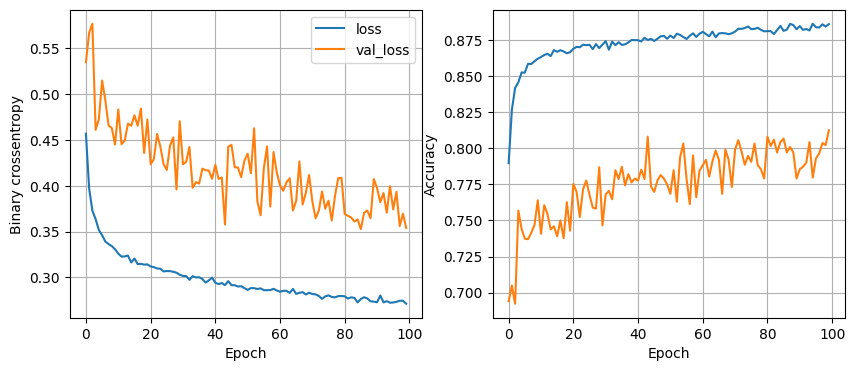

119/119 [==============================] - 0s 769us/step - loss: 0.3060 - accuracy: 0.8796
64 nodes, droupout prob 0.2, lr 0.001, batch size 64


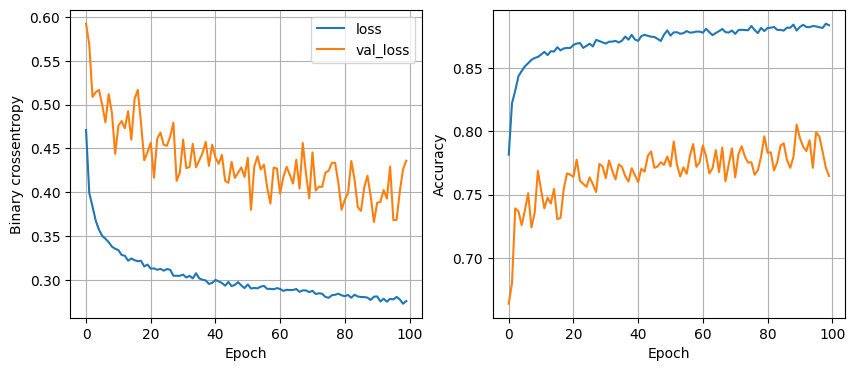

119/119 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8807
64 nodes, droupout prob 0.2, lr 0.001, batch size 128


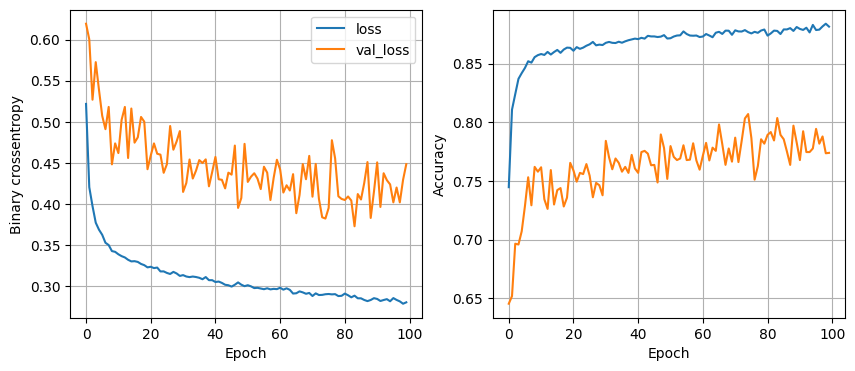

119/119 [==============================] - 0s 696us/step - loss: 0.2996 - accuracy: 0.8849


In [41]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, droupout prob {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model